In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [3]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


Route

In [4]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [5]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [6]:
adherence_count = wego['ADHERENCE'].count()
adherence_max = wego['ADHERENCE'].max()
adherence_mean = wego['ADHERENCE'].mean()

In [7]:
adherence_count_m = {
    'Statistic': ['Count', 'Max', 'Mean'],
    'Value': [adherence_count, adherence_max, adherence_mean]
}

In [8]:
result_df = pd.DataFrame(adherence_count_m)

In [9]:
print(result_df)

  Statistic          Value
0     Count  338861.000000
1       Max      88.383333
2      Mean      -3.188796


In [10]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [11]:
# Percent of on-time stops - using only tagged rows
round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.69

In [12]:
# Percent of early - using only tagged rows
round((wego['ADJUSTED_EARLY_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

2.88

In [13]:
wego['ADJUSTED_ONTIME_COUNT'].sum() / wego.shape[0]

0.7708411236295025

In [14]:
wego['ADJUSTED_EARLY_COUNT'].sum() / wego.shape[0]

0.027902343225939045

In [15]:
#find rows that do not have a value for adjusted on time, early, or late count.
zero_counts = wego[(wego['ADJUSTED_ONTIME_COUNT']==0) & (wego['ADJUSTED_EARLY_COUNT']==0) & (wego['ADJUSTED_LATE_COUNT']==0)]

In [16]:
wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,270048
1,0,1,0,59038
2,0,0,0,11468
3,1,0,0,9775


In [17]:
zero_counts.tail()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
350249,120230930,2,100406533,2023-09-30,7,701,2531,353393,0,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
350295,120230930,2,100406581,2023-09-30,7,702,2312,353438,0,TO DOWNTOWN,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350313,120230930,2,100406599,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350319,120230930,2,100406605,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350321,120230930,2,100406607,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN


In [18]:
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796


In [19]:
wego[wego['PREV_SCHED_STOP_CANCELLED']>=1].sort_values('HDWY_DEV',ascending=False).head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
270201,120230917,3,100026077,2023-09-17,23,2313,2669,350602,0,TO DOWNTOWN,...,568.833333,543.833333,0,0,1,0,1.0,0,0.0,NaN
187823,120230902,2,100388178,2023-09-02,23,2311,2221,350442,0,TO DOWNTOWN,...,523.066666,498.066666,0,0,1,1,1.0,0,0.0,NaN
141314,120230825,1,100168684,2023-08-25,23,2310,3120,350355,0,FROM DOWNTOWN,...,391.033333,361.033333,0,1,0,0,1.0,0,0.0,NaN
227462,120230909,2,100580899,2023-09-09,52,5212,2138,352236,1,FROM DOWNTOWN,...,284.783333,255.783333,0,1,0,0,1.0,0,0.0,NaN
226,120230801,1,99458120,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,...,226.816666,181.816666,0,0,1,1,1.0,0,0.0,NaN


In [20]:
#removing rows where prev sched stop cancelled is marked.
wego = wego[wego['PREV_SCHED_STOP_CANCELLED']!=1]

In [21]:
#removing rows where SCHEDULED_HDWY = 0.00 which caused infinite values.
wego = wego[wego['SCHEDULED_HDWY']!=0.00]

In [22]:
#removing nan rows where ontime, early, and late counts are all = 0.
wego_new= wego.loc[~((wego['ADJUSTED_ONTIME_COUNT']==0) & (wego['ADJUSTED_EARLY_COUNT']==0) & (wego['ADJUSTED_LATE_COUNT']==0))]

In [23]:
#getting clean adherence and hdwy_dev to use in percentile calculations.
adherence = wego_new['ADHERENCE']
adherence_cleaned = adherence.dropna()
hdwy_dev = wego_new['HDWY_DEV']
hdwy_dev_cleaned = hdwy_dev.dropna()

In [24]:
#find the 1st and 99th percentile of adherence.
adherence_1 = np.percentile(adherence_cleaned,0.1)
adherence_99 = np.percentile(adherence_cleaned,99.9)
print(adherence_1)
print(adherence_99)

-57.04575
9.463832695001242


In [25]:
#find the 1st and 99th percentile of hdwy_dev
hdwy_dev_1 = np.percentile(hdwy_dev_cleaned,0.1)
hdwy_dev_99 = np.percentile(hdwy_dev_cleaned,99.9)
print(hdwy_dev_1)
print(hdwy_dev_99)

-21.626300526
56.439450000000946


In [26]:
wego_new = wego_new.drop(wego_new[wego_new.ADHERENCE < adherence_1].index)
wego_new = wego_new.drop(wego_new[wego_new.ADHERENCE > adherence_99].index)
wego_new = wego_new.drop(wego_new[wego_new.HDWY_DEV < hdwy_dev_1].index)
wego_new = wego_new.drop(wego_new[wego_new.HDWY_DEV > hdwy_dev_99].index)

## Question 1.
What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [27]:
# Percent of on-time stops - using only tagged rows in clean data set
round((wego_new['ADJUSTED_ONTIME_COUNT'].sum()) / (wego_new['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_new['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_new['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.9

In [28]:
#shorter code for same answer.
round((wego_new
 ['ADJUSTED_ONTIME_COUNT']
 .mean()
)*100,2)

79.9

In [29]:
# Percent of early count
round((wego_new
 ['ADJUSTED_EARLY_COUNT']
 .mean()
)*100,2)

2.83

In [30]:
# Percent of late count
round((wego_new
 ['ADJUSTED_LATE_COUNT']
 .mean()
)*100,2)



#On-time performance shows that the busses are on time 79.76% of the time.

17.27

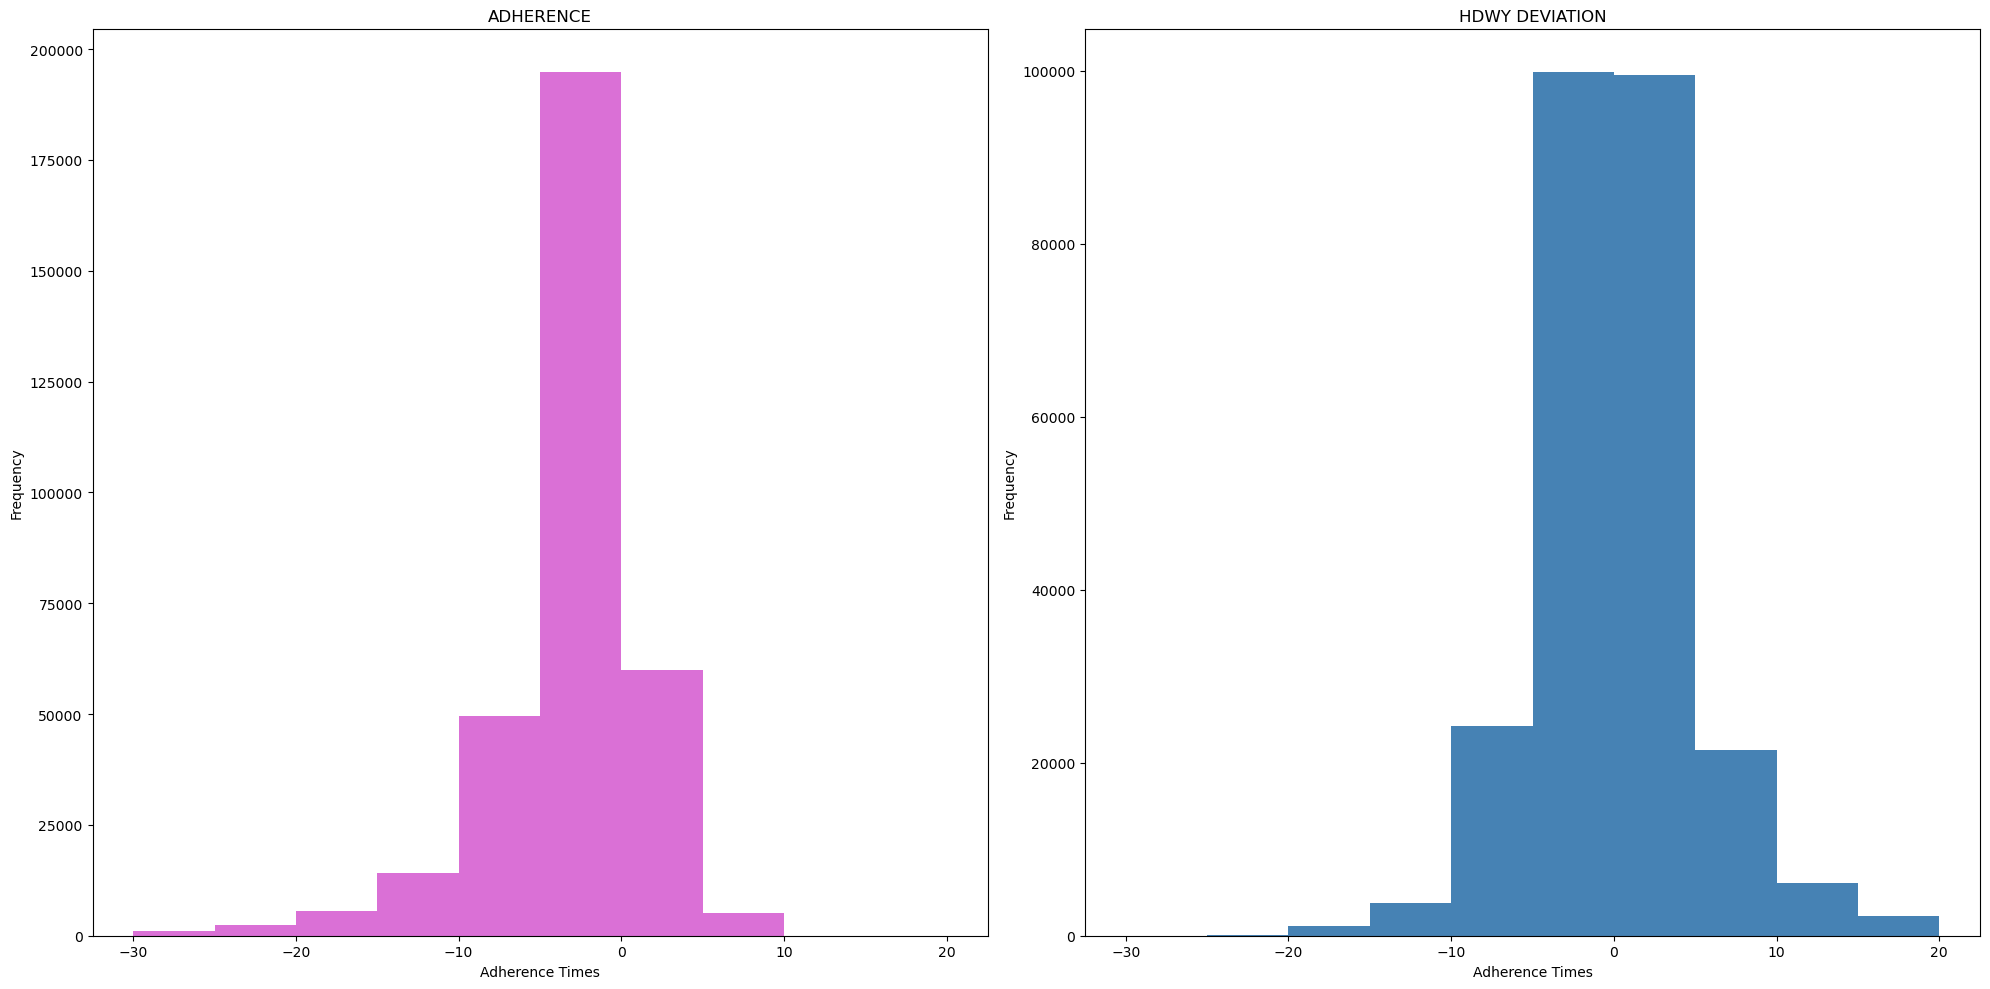

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))  # 1 row, 2 columns

# Adherence
axes[0].hist(wego_new["ADHERENCE"], bins=10, range=(-30, 20), color='orchid')
axes[0].set_xlabel("Adherence Times")
axes[0].set_ylabel("Frequency")
axes[0].set_title("ADHERENCE")

# HDWY Deviation
axes[1].hist(wego_new["HDWY_DEV"], bins=10, range=(-30, 20), color='steelblue')
axes[1].set_xlabel("Adherence Times")
axes[1].set_ylabel("Frequency")
axes[1].set_title("HDWY DEVIATION")

plt.tight_layout()

plt.show()

In [31]:
# xlabel("Values")
# plt.ylabel("Frequency")
# plt.title("HDWY DEVIATION")
# plt.show()

# plt.hist(wego_clean["ADHERENCE"], bins=10, range=(-35,10) )
# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.title("ADHERENCE")
# plt.show()

# plt.hist(wego_clean["HDWY_DEV"], bins=10, range=(-35,40) )
# plt.show()

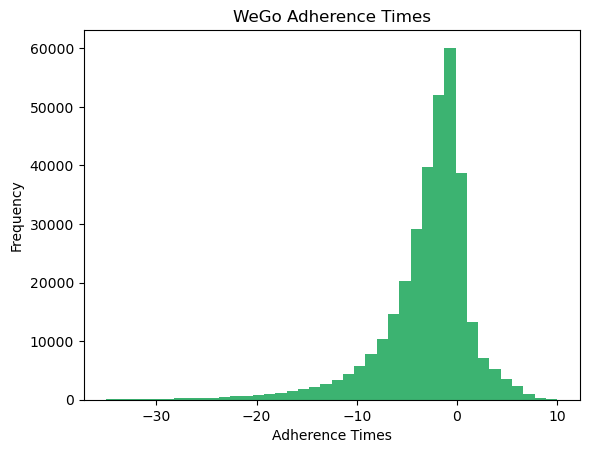

In [52]:
plt.hist(wego.ADHERENCE, bins=40, range=(-35, 10), color='MediumSeaGreen')
plt.title('WeGo Adherence Times')
plt.xlabel('Adherence Times')
plt.ylabel('Frequency')
plt.show()

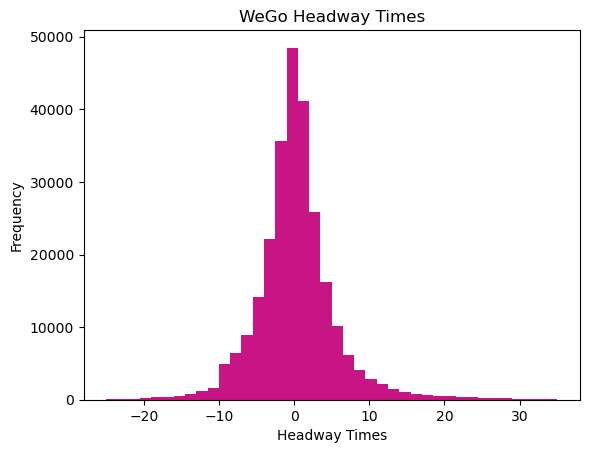

In [58]:
# Headway distribution - removing non-visible outliers
plt.hist(wego.HDWY_DEV, bins=40, range=(-25, 35), color= 'MediumVioletRed')
plt.title('WeGo Headway Times')
plt.xlabel('Headway Times')
plt.ylabel('Frequency')
plt.show() 

In [36]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))  # 1 row, 2 columns

# # Adherence
# axes[0].plot(wego_new["ADHERENCE"], color='skyblue')
# axes[0].set_xlabel("Index")
# axes[0].set_ylabel("Values")
# axes[0].set_title("ADHERENCE")

# # HDWY Deviation
# axes[1].plot(wego_new["HDWY_DEV"], color='skyblue')
# axes[1].set_xlabel("Index")
# axes[1].set_ylabel("Values")
# axes[1].set_title("HDWY DEVIATION")
 
# plt.tight_layout()

# plt.show()

In [56]:
# sns.boxplot(x=wego.ADHERENCE)
# plt.title('WeGo Adherence Times - Box Plot')
# plt.xlabel('Adherence Times')
# plt.show()

In [57]:
# sns.violinplot(x=wego.ADHERENCE)
# plt.title('WeGo Adherence Times - Violin Plot')
# plt.xlabel('Adherence Times')
# plt.show()

In [37]:
#Create additional HDWY category columns: HDWY_DEV_Percentage, BUNCHING, GAPPING, NORMAL_HDWY

In [38]:
wego_new['HDWY_DEV_PERCENTAGE'] = wego_new['HDWY_DEV'] / wego_new['SCHEDULED_HDWY'] *100

In [39]:
wego_new['HDWY_DEV_PERCENTAGE'].min()

-100.0

In [40]:
#create BUNCHING column and set condition to 1 if less than -50
wego_new['BUNCHING'] = np.where(wego_new['HDWY_DEV_PERCENTAGE'] 
                       < -50, '1','0')

In [41]:
wego_new['BUNCHING'].value_counts()

BUNCHING
0    316682
1     17242
Name: count, dtype: int64

In [42]:
#create GAPPING column and set condition to 1 if greater than 50
wego_new['GAPPING'] = np.where(wego_new['HDWY_DEV_PERCENTAGE'] 
                       > 50, '1','0')

In [43]:
wego_new['GAPPING'].value_counts()

GAPPING
0    313362
1     20562
Name: count, dtype: int64

In [44]:
#create NORMAL_HDWY column and set condition to 1 if >= than -50 and <= 50.
wego_new['NORMAL_HDWY'] = np.where((wego_new['HDWY_DEV_PERCENTAGE'] 
                       >= -50)&(wego_new['HDWY_DEV_PERCENTAGE'] 
                       <= 50), '1','0')

In [45]:
wego_new['NORMAL_HDWY'].value_counts()

NORMAL_HDWY
1    223481
0    110443
Name: count, dtype: int64

In [46]:
#create HDWY_NULL column and set condition to 1 if >= than -50 and <= 50.
wego_new['HDWY_NULL'] = np.where(wego_new['HDWY_DEV_PERCENTAGE'].isna()==True,'1','0')

In [47]:
wego_new[['BUNCHING','GAPPING','NORMAL_HDWY','HDWY_NULL']].value_counts().sort_values().reset_index()

,BUNCHING,GAPPING,NORMAL_HDWY,HDWY_NULL,count
0,1,0,0,0,17242
1,0,1,0,0,20562
2,0,0,0,1,72639
3,0,0,1,0,223481


In [48]:
#convert data types for bunching, gapping, and normal_hdwy from objects to floats.
wego_new = wego_new.astype({'BUNCHING': float, 'GAPPING': float, 'NORMAL_HDWY': float, 'HDWY_NULL': float})

In [49]:
#dropping where SCHEDULED_HDWY = NaN, which causes BUNCHING GAPPING and NORMAL_HDWY to not add up to 100%.
wego_hdwy = wego_new.dropna(subset=['SCHEDULED_HDWY'])

## Question 2.
How does direction of travel, route, or location affect the headway and on-time performance?

In [46]:
wego_new.ROUTE_DIRECTION_NAME.value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    176991
TO DOWNTOWN      156933
Name: count, dtype: int64

In [47]:
#create from down town and to downtown 
wego_from_downtown = wego_new[wego_new['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN']
wego_to_downtown = wego_new[wego_new['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']

In [48]:
trip_direction_ontime = wego_new.groupby('ROUTE_DIRECTION_NAME')[['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']].mean()

In [49]:
trip_direction_ontime

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,0.752236,0.028877,0.218887
TO DOWNTOWN,0.851701,0.027585,0.120714


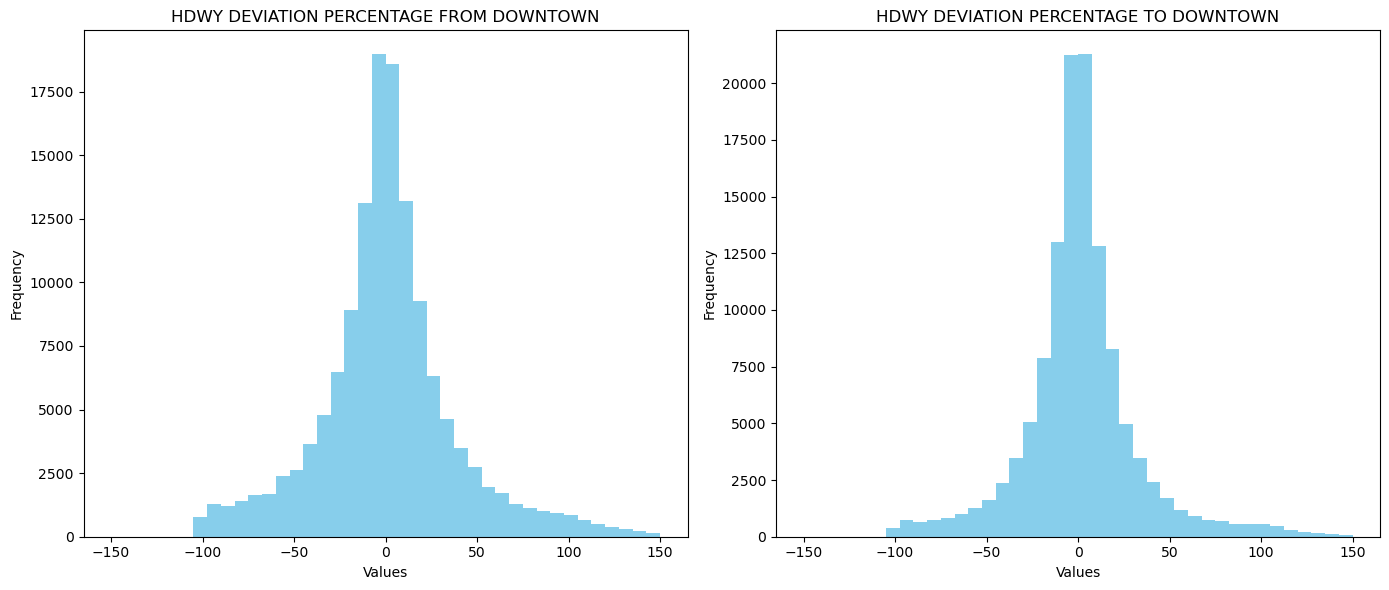

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # 1 row, 2 columns

axes[0].hist(wego_from_downtown["HDWY_DEV_PERCENTAGE"], bins=40, range=(-150, 150), color='skyblue')
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Frequency")
axes[0].set_title("HDWY DEVIATION PERCENTAGE FROM DOWNTOWN")

axes[1].hist(wego_to_downtown["HDWY_DEV_PERCENTAGE"], bins=40, range=(-150, 150), color='skyblue')
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Frequency")
axes[1].set_title("HDWY DEVIATION PERCENTAGE TO DOWNTOWN")

plt.tight_layout()

plt.show()

In [51]:
trip_direction_hdwy = wego_hdwy.groupby('ROUTE_DIRECTION_NAME')[['NORMAL_HDWY','GAPPING','BUNCHING']].mean()
trip_direction_hdwy

,NORMAL_HDWY,GAPPING,BUNCHING
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,0.825684,0.093118,0.080660
TO DOWNTOWN,0.888115,0.062164,0.049189


In [52]:
#Percentage of HDWY by route.
(wego_hdwy
 .groupby('ROUTE_ABBR')
 [['NORMAL_HDWY','GAPPING','BUNCHING']]
 .mean()
)

,NORMAL_HDWY,GAPPING,BUNCHING
ROUTE_ABBR,,,
3,0.864669,0.076727,0.058078
7,0.912330,0.050273,0.037396
22,0.939642,0.041508,0.017771
23,0.914219,0.063451,0.021686
50,0.933656,0.036569,0.029454
52,0.837162,0.089238,0.071920
55,0.741523,0.127037,0.131419
56,0.844897,0.080051,0.074884


In [53]:
#Percentage of ontime by route.
(wego_new
 .groupby('ROUTE_ABBR')
 [['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
 .mean()
)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
ROUTE_ABBR,,,
3,0.760399,0.029886,0.209715
7,0.779921,0.022055,0.198024
22,0.892930,0.025353,0.081716
23,0.887926,0.031579,0.080495
50,0.853307,0.027919,0.118774
52,0.769609,0.030679,0.199712
55,0.700198,0.025224,0.274579
56,0.822441,0.029173,0.148385


In [54]:
round(wego_new.groupby(by='ROUTE_ABBR').agg(HeadwayDeviation=('HDWY_DEV', 'mean'), Adherence=('ADHERENCE', 'mean')),2)

,HeadwayDeviation,Adherence
ROUTE_ABBR,,
3,0.54,-3.71
7,0.33,-3.48
22,0.57,-1.07
23,0.82,-1.64
50,0.17,-2.42
52,0.71,-3.73
55,0.19,-4.62
56,0.12,-2.65


## Question 3.
How does time of day or day of week affect headway and on-time performance?

In [55]:
wego_new['DATE_TIME'] = pd.to_datetime(wego_new['SCHEDULED_TIME'])

In [56]:
wego_new['MONTH'] = wego_new['DATE_TIME'].dt.month
wego_new['DAY'] = wego_new['DATE_TIME'].dt.day
wego_new['HOUR'] = wego_new['DATE_TIME'].dt.hour
wego_new['DAY_NAME'] = wego_new['DATE_TIME'].dt.day_name()

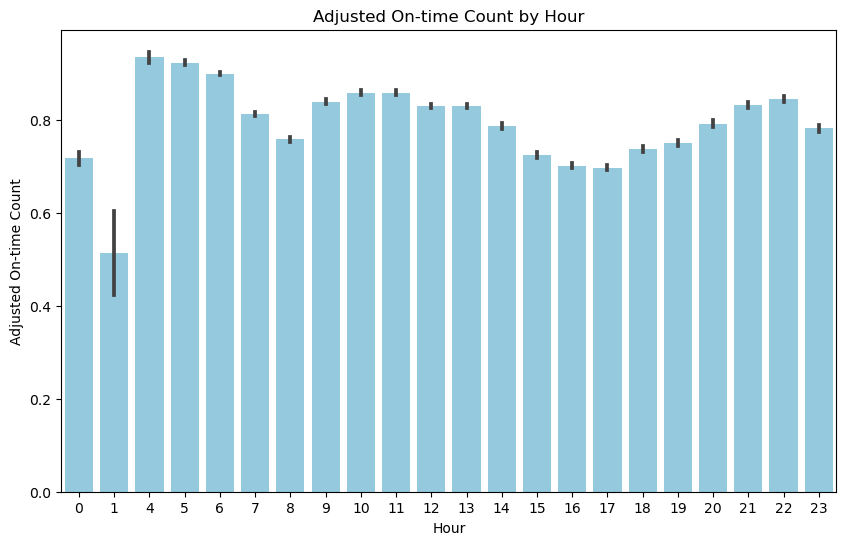

In [57]:
color = 'skyblue'  

plt.figure(figsize=(10, 6))  
sns.barplot(data=wego_new, x='HOUR', y='ADJUSTED_ONTIME_COUNT', color=color)

plt.xlabel("Hour")
plt.ylabel("Adjusted On-time Count")
plt.title("Adjusted On-time Count by Hour")

plt.show() 

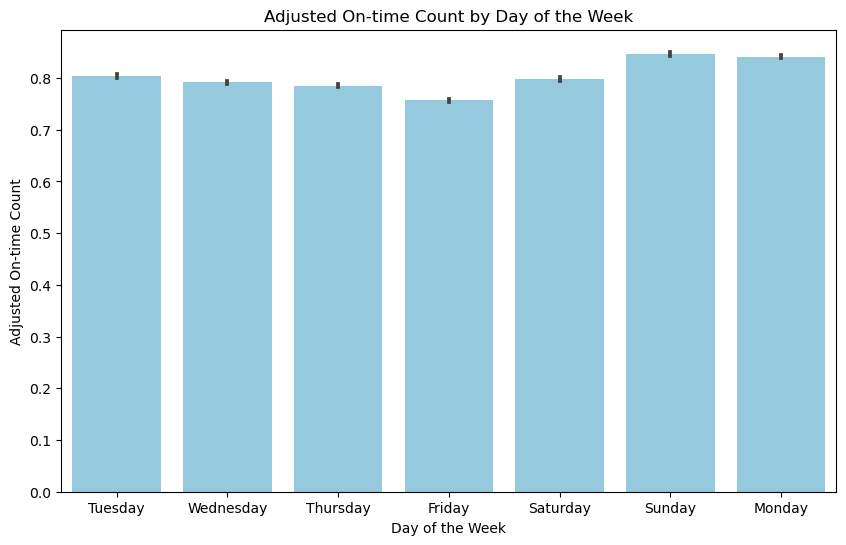

In [58]:
color = 'skyblue'  

plt.figure(figsize=(10, 6)) 
sns.barplot(data=wego_new, x='DAY_NAME', y='ADJUSTED_ONTIME_COUNT', color=color)

plt.xlabel("Day of the Week")
plt.ylabel("Adjusted On-time Count")
plt.title("Adjusted On-time Count by Day of the Week")

plt.show()

In [59]:
#Percentage of on time by day.
(wego_new
 .groupby(wego_new['DAY_NAME'])
 [['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
 .mean()
)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
DAY_NAME,,,
Friday,0.756604,0.027943,0.215453
Monday,0.841206,0.033269,0.125525
Saturday,0.797629,0.021667,0.180705
Sunday,0.846369,0.030194,0.123437
Thursday,0.784857,0.027551,0.187592
Tuesday,0.803493,0.027927,0.168580
Wednesday,0.791478,0.028685,0.179837


In [60]:
#Percentage of HDWY by day
(wego_hdwy
 .groupby (wego_new['DAY_NAME'])
 [['NORMAL_HDWY','GAPPING','BUNCHING']]
 .mean()
)

,NORMAL_HDWY,GAPPING,BUNCHING
DAY_NAME,,,
Friday,0.803842,0.105631,0.089947
Monday,0.875584,0.064922,0.058707
Saturday,0.923848,0.044617,0.031391
Sunday,0.938135,0.040806,0.020109
Thursday,0.828317,0.093102,0.078052
Tuesday,0.844974,0.083271,0.071391
Wednesday,0.838261,0.085299,0.075942


In [61]:
# print(wego_hdwy.head())

In [62]:
# print(wego_hdwy.columns)

In [63]:
#Percentage of on time by hour
(wego_new
 .groupby('HOUR')
 [['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
 .mean()
)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
HOUR,,,
0,0.718494,0.088371,0.193135
1,0.513514,0.234234,0.252252
4,0.936574,0.040901,0.022525
5,0.923647,0.035571,0.040782
6,0.900309,0.027122,0.072569
7,0.812881,0.023713,0.163407
8,0.758470,0.019079,0.222452
9,0.839944,0.028553,0.131504
10,0.858531,0.036677,0.104792


In [64]:
#Percentage of HDWY by hour
(wego_hdwy
 .groupby(wego_new['HOUR'])
 [['NORMAL_HDWY','GAPPING','BUNCHING']]
 .mean()
)

,NORMAL_HDWY,GAPPING,BUNCHING
HOUR,,,
0,0.920796,0.043919,0.035285
1,0.571429,0.285714,0.142857
4,0.992095,0.000000,0.000000
5,0.949796,0.026459,0.015265
6,0.908585,0.052387,0.036540
7,0.849268,0.087487,0.061585
8,0.814355,0.092575,0.092575
9,0.863352,0.068605,0.068043
10,0.877571,0.066786,0.055644


## Question 4.
How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [65]:
wego_new.OPERATOR.unique()

array([1040, 2374, 2689, 1617, 2427, 1892, 1190, 1222, 2355, 2125, 2649,
       1761, 1893, 2041, 1170, 1823, 1198, 1147,  522, 2603,  409, 2958,
       2088, 2348, 2706, 1368, 3100, 2529, 1237, 1992, 2059, 2441, 1204,
        326, 2177,  559, 2963, 1948, 2230, 1703, 2569, 2055, 2675, 2752,
        517, 2586, 2623,  907, 1682, 1619, 1133,  659, 1266, 1623, 1938,
       1410, 1705, 1927, 1391, 2629,  304,  357, 2500, 2112, 1505, 1904,
       1052, 1800, 2253, 1489, 1542, 2624, 2062,  359, 1582, 2428,  332,
       2967, 3016, 2760, 2584, 1206, 2399, 3124, 2109, 1208, 3012, 1361,
       2990, 1650, 1359,  611, 1590, 2832, 2560,  520, 2371, 1175, 2200,
       1352, 2714, 1500, 2817, 3096, 1958, 2458, 1601, 1343, 2217, 1866,
       2987, 1372, 2792, 1330, 2733, 1713, 1406, 2780,  471, 2638, 1780,
       1177, 2221, 1743,  572, 2400,  341, 2312,  778, 2697,  723, 2324,
       2164, 2618, 2563, 2809, 2448, 1762, 1401, 2352,  414, 2357, 2545,
       2306, 3088, 3015, 2703,  624, 1566, 2040, 31

In [66]:
wego_new['OPERATOR'].value_counts()

OPERATOR
1266    2814
1147    2679
1133    2602
2352    2542
2424    2472
        ... 
2377       9
2256       6
56         3
0          1
473        1
Name: count, Length: 340, dtype: int64

In [67]:
operator_1266 = wego_new[wego_new['OPERATOR']==1266]
operator_1266.count()

CALENDAR_ID                  2814
SERVICE_ABBR                 2814
ADHERENCE_ID                 2814
DATE                         2814
ROUTE_ABBR                   2814
BLOCK_ABBR                   2814
OPERATOR                     2814
TRIP_ID                      2814
OVERLOAD_ID                  2814
ROUTE_DIRECTION_NAME         2814
TIME_POINT_ABBR              2814
ROUTE_STOP_SEQUENCE          2814
TRIP_EDGE                    2814
LATITUDE                     2814
LONGITUDE                    2814
SCHEDULED_TIME               2814
ACTUAL_ARRIVAL_TIME          2814
ACTUAL_DEPARTURE_TIME        2814
ADHERENCE                    2814
SCHEDULED_HDWY               2340
ACTUAL_HDWY                  2340
HDWY_DEV                     2340
ADJUSTED_EARLY_COUNT         2814
ADJUSTED_LATE_COUNT          2814
ADJUSTED_ONTIME_COUNT        2814
STOP_CANCELLED               2814
PREV_SCHED_STOP_CANCELLED    2340
IS_RELIEF                    2814
DWELL_IN_MINS                2814
SCHEDULED_LAYO

In [70]:
#Getting unique trip and operator
unique_trips = wego[['TRIP_ID', 'CALENDAR_ID', 'OPERATOR']].drop_duplicates()


In [71]:
# Grouping by operator to view # trips
operator_trip_counts = unique_trips.groupby('OPERATOR').size().reset_index(name='Number_of_Trips')
operator_trip_counts.sort_values('Number_of_Trips', ascending=False)

,OPERATOR,Number_of_Trips
106,1762,803
105,1761,738
164,2164,574
13,379,553
189,2352,548
...,...,...
12,375,2
1,56,2
176,2256,2
18,473,1
